<a href="https://colab.research.google.com/github/loiswoo/Time-Series/blob/main/TS_study_w4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VAR를 이용하여 LMBA Gold price 예측하기

비정상적인 시계열을 정상적인 시계열로 변형하여 분석

데이터셋 :  https://www.kaggle.com/datasets/kamyababedi/lbma-gold-prices-1968-2023

베이스라인: https://dining-developer.tistory.com/32 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import adfuller

In [ ]:
df = pd.read_csv("/content/LBMA-GOLD.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13939 entries, 0 to 13938
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13939 non-null  object 
 1   USD (AM)   13938 non-null  float64
 2   USD (PM)   13792 non-null  float64
 3   GBP (AM)   13928 non-null  float64
 4   GBP (PM)   13781 non-null  float64
 5   EURO (AM)  6102 non-null   float64
 6   EURO (PM)  6055 non-null   float64
dtypes: float64(6), object(1)
memory usage: 762.4+ KB


In [ ]:
df.isnull().sum()

Date            0
USD (AM)        1
USD (PM)      147
GBP (AM)       11
GBP (PM)      158
EURO (AM)    7837
EURO (PM)    7884
dtype: int64

In [ ]:
df.head(10)

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2023-02-24,1824.10,1810.95,1517.29,1516.13,1722.13,1717.87
1,2023-02-23,1826.95,1826.05,1518.01,1515.07,1724.64,1721.97
2,2023-02-22,1833.45,1835.75,1518.46,1516.33,1723.63,1723.03
3,2023-02-21,1833.20,1836.85,1516.42,1519.26,1719.91,1723.70
4,2023-02-20,1844.20,1845.80,1533.27,1532.94,1725.99,1726.19
5,2023-02-17,1824.50,1833.95,1527.65,1527.50,1714.85,1719.69
6,2023-02-16,1837.30,1828.95,1522.94,1526.62,1715.67,1715.37
7,2023-02-15,1835.45,1831.20,1518.65,1526.49,1711.56,1716.02
8,2023-02-14,1860.50,1863.70,1525.80,1528.23,1730.08,1732.87
9,2023-02-13,1858.50,1856.05,1544.04,1531.80,1740.30,1733.55


In [ ]:
df.tail(10)

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
13929,1968-01-15,35.18,NaN,14.597,NaN,NaN,NaN
13930,1968-01-12,35.18,NaN,14.607,NaN,NaN,NaN
13931,1968-01-11,35.17,NaN,14.596,NaN,NaN,NaN
13932,1968-01-10,35.15,NaN,14.576,NaN,NaN,NaN
13933,1968-01-09,35.14,NaN,14.576,NaN,NaN,NaN
13934,1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN
13935,1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
13936,1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
13937,1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN
13938,1968-01-02,35.18,NaN,14.641,NaN,NaN,NaN


In [ ]:
df.shape 

(13939, 7)

분석의 편의를 위하여 

1) 2020-02-24 ~ 2023-02-24 이후 Date

2) USD, GBP, EURO의 AM 자료만 이용


In [ ]:
df['Date'] = pd.to_datetime(df.Date)

In [ ]:
df= df[df['Date'].between('2020-02-24', '2023-02-24')]

In [ ]:
df.shape

(759, 7)

In [ ]:
df.index = df['Date']

In [ ]:
df = df[['USD (AM)', 'GBP (AM)', 'EURO (AM)']]

In [ ]:
df.head()

,USD (AM),GBP (AM),EURO (AM)
Date,,,
2023-02-24,1824.10,1517.29,1722.13
2023-02-23,1826.95,1518.01,1724.64
2023-02-22,1833.45,1518.46,1723.63
2023-02-21,1833.20,1516.42,1719.91
2023-02-20,1844.20,1533.27,1725.99


## Check for Stationary 

<Axes: xlabel='Date'>

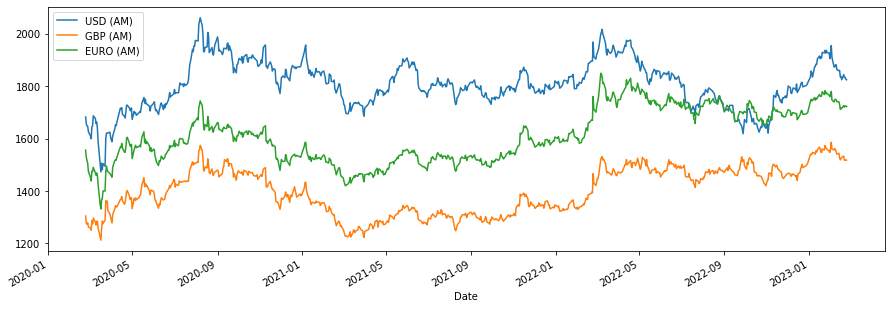

In [ ]:
df.plot(figsize=(15,5))

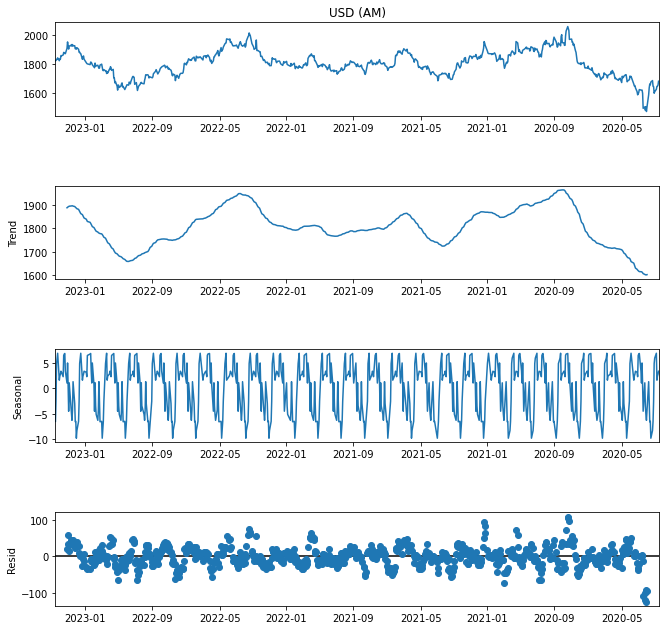

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df['USD (AM)'], model = 'additive', period = 30) #period를 1개월
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()    

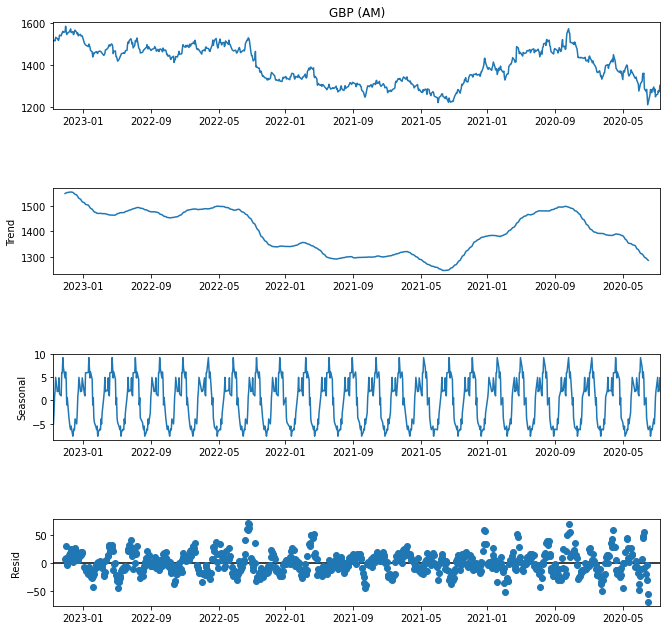

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df['GBP (AM)'], model = 'additive', period = 30) #period를 1개월
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()    

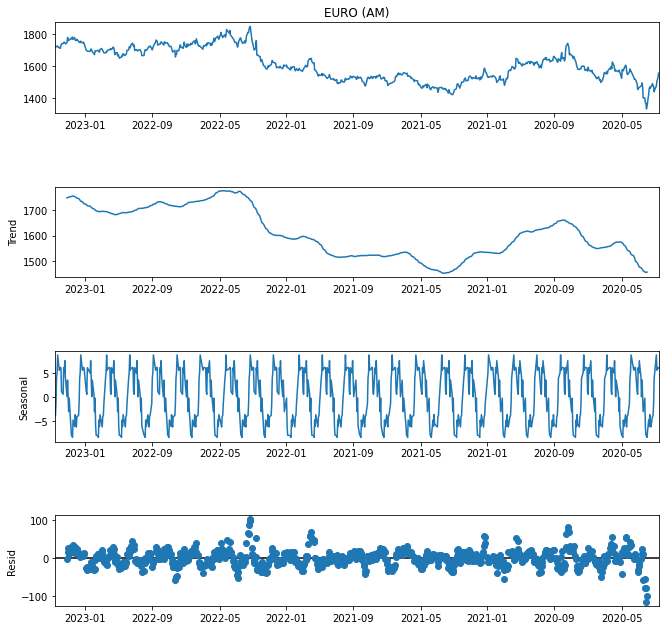

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df['EURO (AM)'], model = 'additive', period = 30) #period를 1개월
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()    

In [ ]:
aftest1 = adfuller(df['USD (AM)'], autolag= "AIC")
print("ADF test statistic: {}".format(aftest1[0]))
print("p-value: {}".format(aftest1[1]))

ADF test statistic: -2.10986894395582
p-value: 0.24056481157615672


In [ ]:
aftest2 = adfuller(df['GBP (AM)'], autolag= "AIC")
print("ADF test statistic: {}".format(aftest2[0]))
print("p-value: {}".format(aftest2[1]))

ADF test statistic: -2.0365755037372173
p-value: 0.27076976223496896


In [ ]:
aftest3 = adfuller(df['EURO (AM)'], autolag= "AIC")
print("ADF test statistic: {}".format(aftest3[0]))
print("p-value: {}".format(aftest3[1]))

ADF test statistic: -1.7196922202557203
p-value: 0.4209960756355108


Seasonal Decomposition과 Adfuller Test을 모두 시행해보았을 때, 세 변수 모두 nonstationary한 데이터라는 것을 알 수 있다.



따라서 1. Stationary data로 변형  2. Nonstationary data로 그대로 진행 하는 방법을 생각해볼 수 있다. 

## Stationary Data로 변형

In [ ]:
#차분 진행
df_diff = df.diff().dropna()

In [ ]:
aftest1 = adfuller(df_diff['USD (AM)'], autolag= "AIC")
print("ADF test statistic: {}".format(aftest1[0]))
print("p-value: {}".format(aftest1[1]))

aftest2 = adfuller(df_diff['GBP (AM)'], autolag= "AIC")
print("ADF test statistic: {}".format(aftest2[0]))
print("p-value: {}".format(aftest2[1]))

aftest3 = adfuller(df_diff['EURO (AM)'], autolag= "AIC")
print("ADF test statistic: {}".format(aftest3[0]))
print("p-value: {}".format(aftest3[1]))

ADF test statistic: -13.424159279286103
p-value: 4.133530336172788e-25
ADF test statistic: -13.397592504279455
p-value: 4.6341266707939725e-25
ADF test statistic: -13.264764653410106
p-value: 8.2610660160405e-25


USD, GBP, EURO 모두 p-value의 값이 매우 작다. 즉, Stationary 데이터라고 볼 수 있다. 

## Modeling

In [ ]:
#test는 마지막 한달 30일
df_train = df_diff.iloc[:-30,:]
df_test = df_diff.iloc[-30:,:]

In [ ]:
forecasting_model = VAR(df_train)
results_aic = []
for p in range(1,10):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


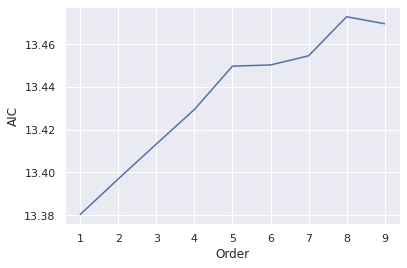

In [ ]:
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

시차 = 1일때 AIC가 13.38로 가장 낮기 때문에 p = 1로 선정

In [ ]:
results = forecasting_model.fit(1) #p=1
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Mar, 2023
Time:                     17:19:28
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    13.4561
Nobs:                     727.000    HQIC:                   13.4096
Log likelihood:          -7946.47    FPE:                    647177.
AIC:                      13.3804    Det(Omega_mle):         636611.
--------------------------------------------------------------------
Results for equation USD (AM)
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.286221         0.630074           -0.454           0.650
L1.USD (AM)          0.181920         0.070022            2.598           0.009
L1.GBP (AM)         -0.076695         0.100655           -0.7

- USD(AM)의 절대값은 0.286221, GBP(AM)의 절대값은 0.270923, EURO(AM)의 절대값은 0.308490이다.

- 세 변수의 값이 비슷하지만, EURO의 절대값이 가장 커서 가장 빨리 조정한다는 것을 알 수 있다. 

## Forecast

In [ ]:
#30일 예측
laaged_values = df_train.values[-1:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=30), index = df_test.index, columns= ['USD (AM)_1d','GBP (AM)_1d', 'EURO (AM)_1d'])
forecast

,USD (AM)_1d,GBP (AM)_1d,EURO (AM)_1d
Date,,,
2020-04-03,-1.375515,0.115511,-0.774193
2020-04-02,-0.408773,-0.412201,-0.406515
2020-04-01,-0.257276,-0.248816,-0.281190
2020-03-31,-0.264349,-0.258147,-0.289230
2020-03-30,-0.263502,-0.257448,-0.288464
2020-03-27,-0.263537,-0.257471,-0.288500
2020-03-26,-0.263535,-0.257471,-0.288498
2020-03-25,-0.263535,-0.257471,-0.288498
2020-03-24,-0.263535,-0.257471,-0.288498


In [ ]:
#차분하기 이전 데이터로 변경
forecast["USD (AM)_pred"] = df["USD (AM)"].iloc[-30-1] + forecast['USD (AM)_1d'].cumsum()
forecast["GBP (AM)_pred"] = df["GBP (AM)"].iloc[-30-1] + forecast['GBP (AM)_1d'].cumsum() 
forecast["EURO (AM)_pred"] = df["EURO (AM)"].iloc[-30-1] + forecast['EURO (AM)_1d'].cumsum() 
forecast

,USD (AM)_1d,GBP (AM)_1d,EURO (AM)_1d,USD (AM)_pred,GBP (AM)_pred,EURO (AM)_pred
Date,,,,,,
2020-04-03,-1.375515,0.115511,-0.774193,1635.224485,1330.835511,1514.715807
2020-04-02,-0.408773,-0.412201,-0.406515,1634.815712,1330.423310,1514.309292
2020-04-01,-0.257276,-0.248816,-0.281190,1634.558437,1330.174494,1514.028102
2020-03-31,-0.264349,-0.258147,-0.289230,1634.294088,1329.916347,1513.738871
2020-03-30,-0.263502,-0.257448,-0.288464,1634.030585,1329.658899,1513.450407
2020-03-27,-0.263537,-0.257471,-0.288500,1633.767049,1329.401428,1513.161908
2020-03-26,-0.263535,-0.257471,-0.288498,1633.503513,1329.143957,1512.873410
2020-03-25,-0.263535,-0.257471,-0.288498,1633.239978,1328.886487,1512.584912
2020-03-24,-0.263535,-0.257471,-0.288498,1632.976443,1328.629016,1512.296414


<ipython-input-55-a76cb8341c03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["USD (AM)_pred"] = forecast["USD (AM)_pred"]
<ipython-input-55-a76cb8341c03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["GBP (AM)_pred"] = forecast["GBP (AM)_pred"]
<ipython-input-55-a76cb8341c03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

<Axes: xlabel='Date'>

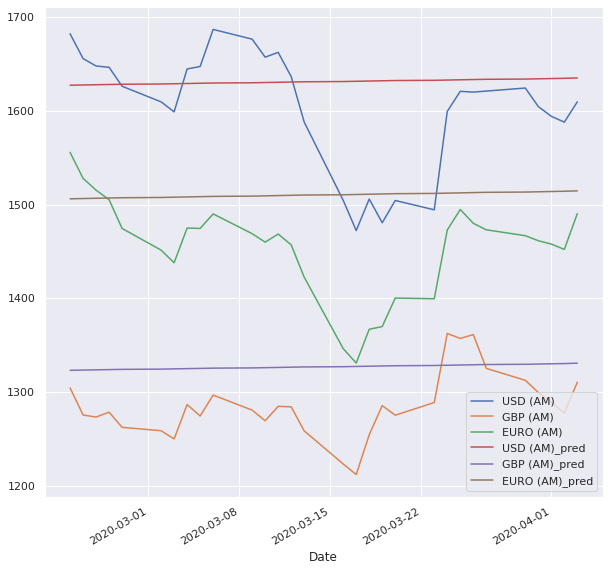

In [ ]:
test = df.iloc[-30:,:]
test["USD (AM)_pred"] = forecast["USD (AM)_pred"]
test["GBP (AM)_pred"] = forecast["GBP (AM)_pred"]
test["EURO (AM)_pred"] = forecast["EURO (AM)_pred"]
test.plot(figsize = (10,10))